**Import the necessary libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Read in the data set**

In [33]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1OBi7A_6Y2kCmADmRB7Ufg_roUhQaVaLR/view?usp=drive_link"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
loan = pd.read_csv(csv_raw) # the sep argument indicates how the data values are separated


**Examine the first few lines of the data set**

In [34]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Examine the data information**

In [35]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Separate the numerical and categorical variables**

In [36]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

cat_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

**Examine the first few rows of the numerical data**

In [37]:
loan[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


**Examine the first few rows of the categorical data**

In [38]:
loan[cat_cols].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


**Replace the value 3+ to 3 in 'Dependent' column (To keep the datset simple and fill the missing values)**

*Please note this will have no impact on the model*

In [39]:
loan['Dependents'] = loan['Dependents'].replace('3+', '3', regex=True)

**Check for missing values**

In [40]:
loan.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

**Handle Missing Values**

In [41]:
for column in cat_cols:
    # Fill missing values with the mode (most frequent value) of the column
    loan[column].fillna(loan[column].mode()[0], inplace=True)

for column in num_cols:
    # Fill missing values with the median of the column
    loan[column].fillna(loan[column].median(), inplace=True)

**Check for missing values after handling them**

In [42]:
loan.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

**Sumarizing Numerical Data**

In [43]:
#Checking summary statistics
loan[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0


**Single Variable Analysis**

**Visualizing Numerical Data**

**Histograms**

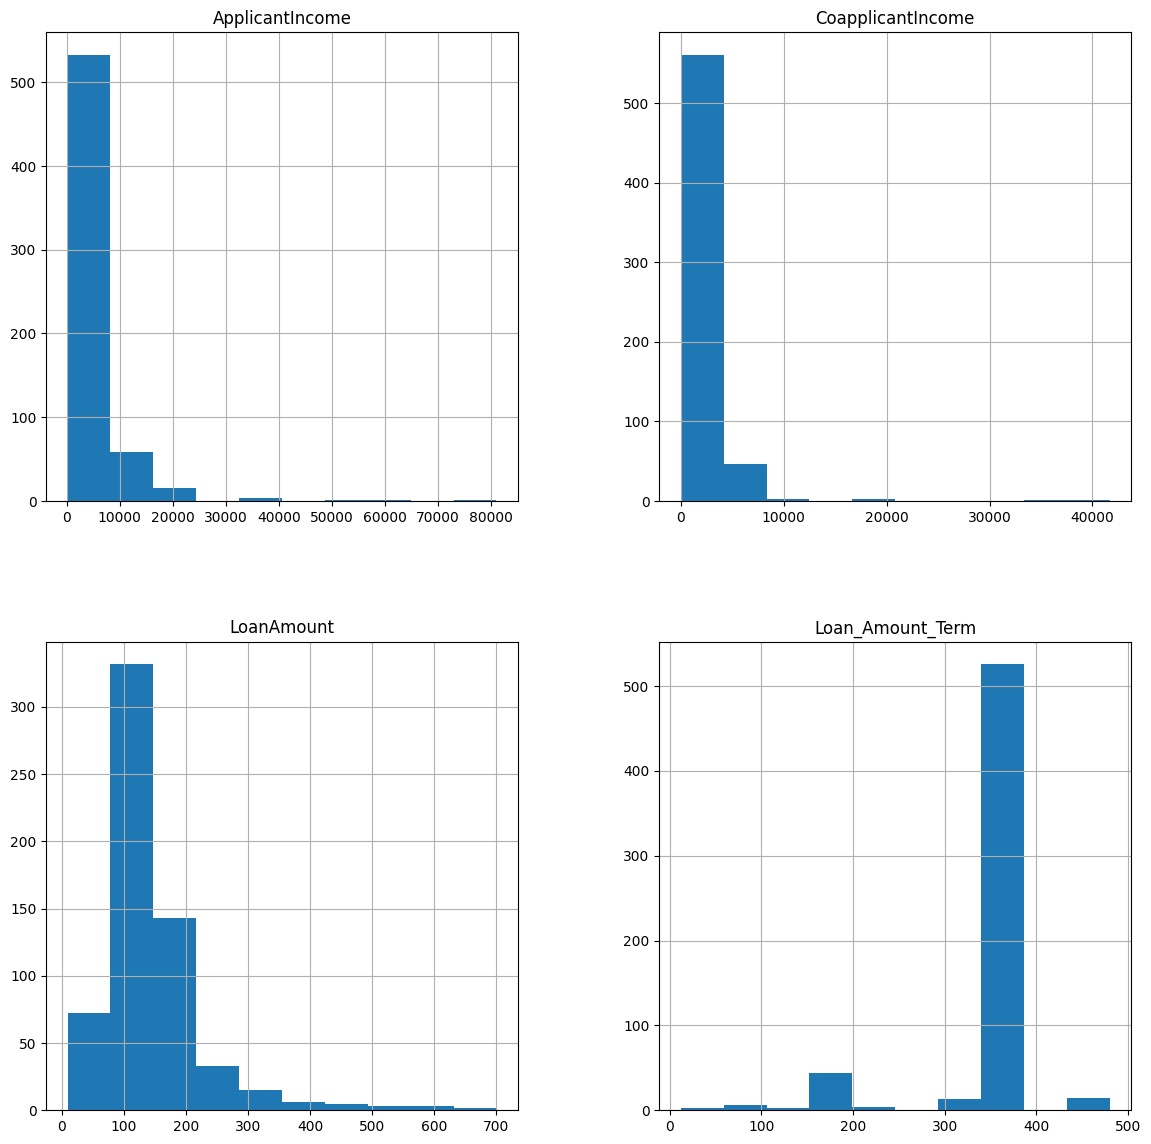

In [44]:
#creating histograms
loan[num_cols].hist(figsize=(14,14))
plt.show()

**Correlation Heatmap**

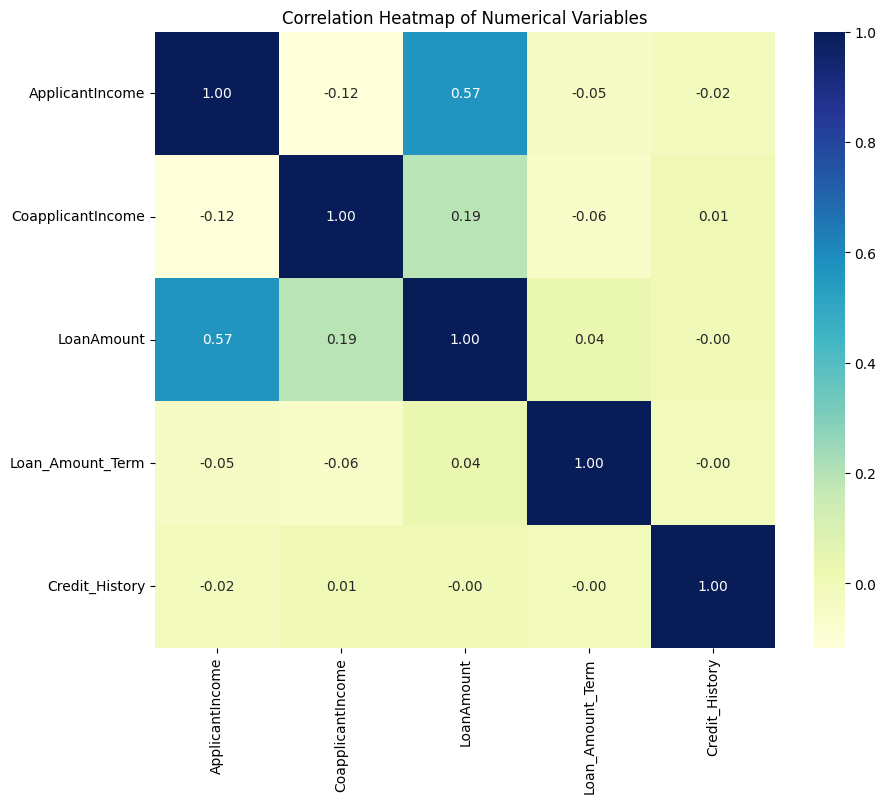

In [45]:
numerical_data = loan.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Boxplots**

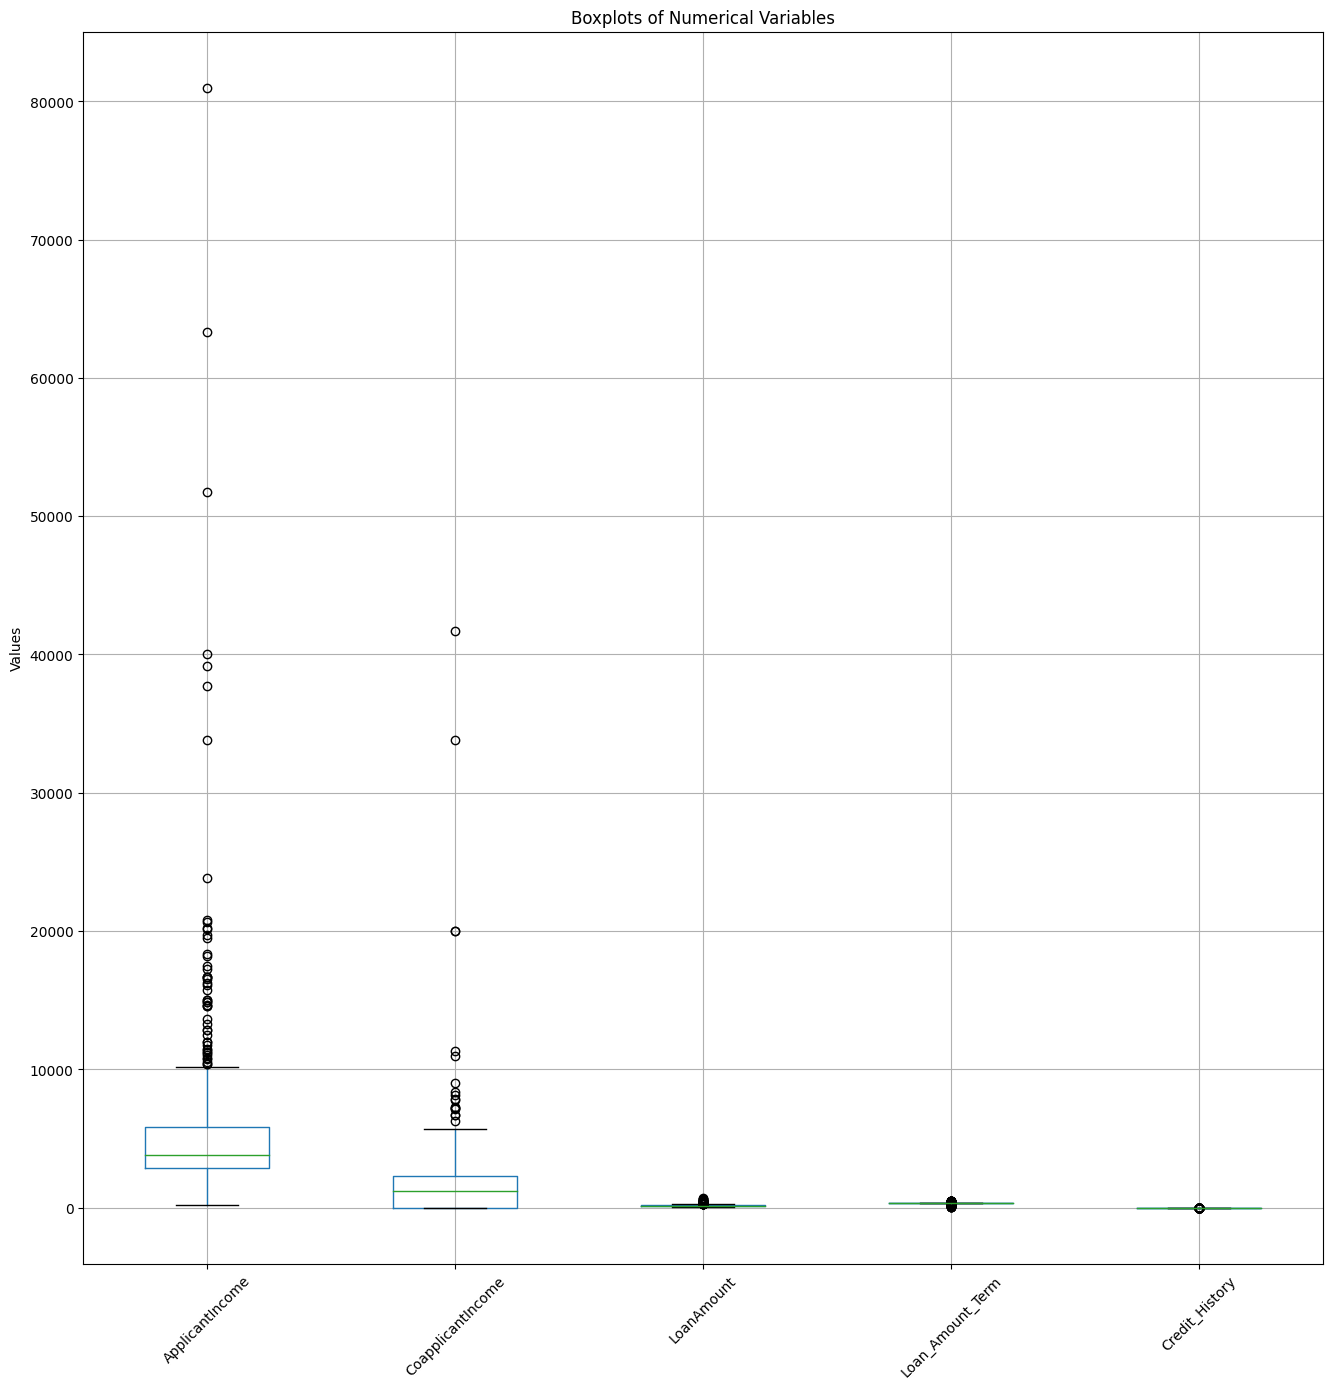

In [46]:
numerical_data = loan.select_dtypes(include=['int64', 'float64'])

# Create boxplots
plt.figure(figsize=(16, 16))
numerical_data.boxplot()
plt.title('Boxplots of Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Scatter Plot**

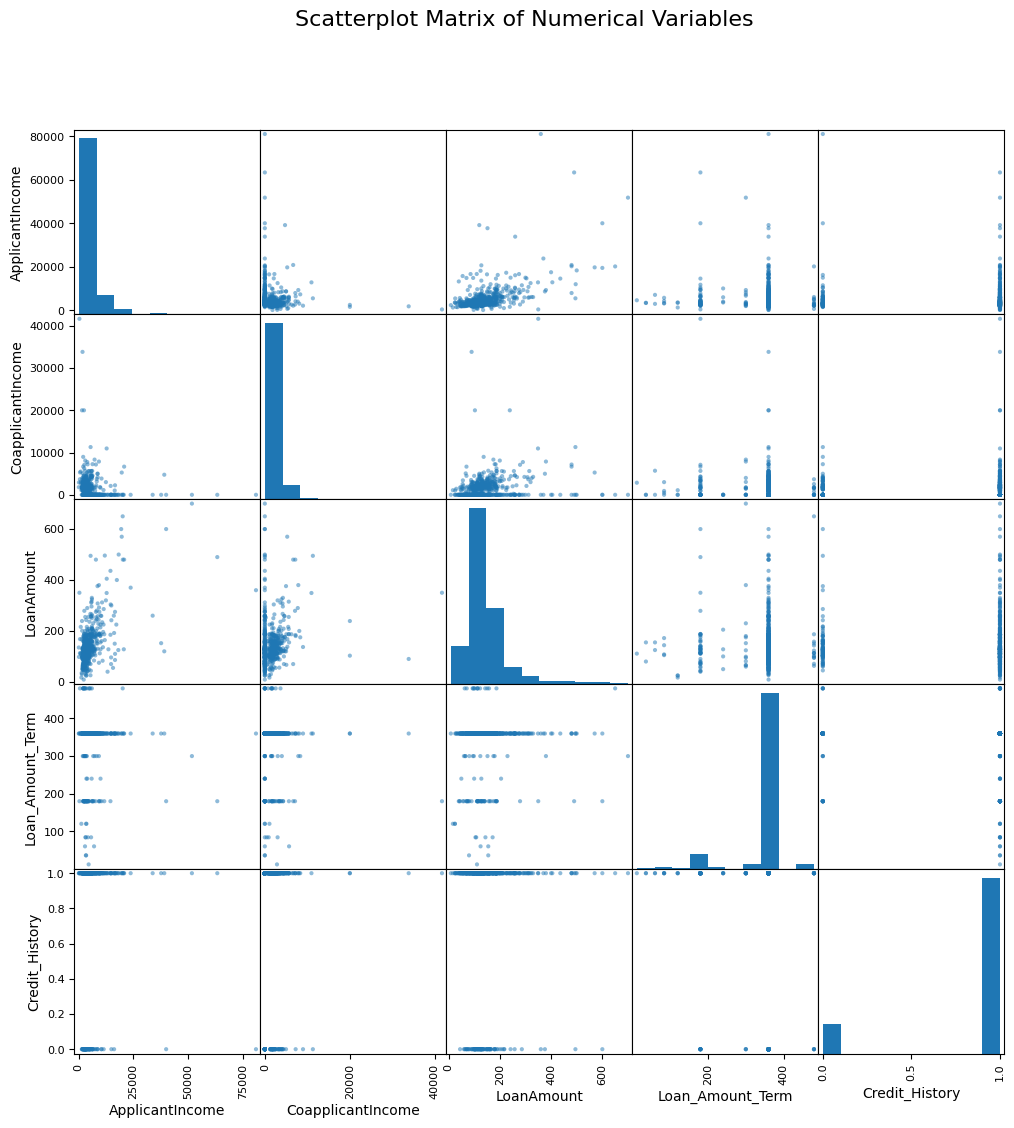

In [47]:
from pandas.plotting import scatter_matrix

numerical_data = loan.select_dtypes(include=['int64', 'float64'])

# Create scatterplot matrix
scatter_matrix(numerical_data, figsize=(12, 12))
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16)
plt.show()

**Summarizing Categorical Data**

In [48]:
for i in cat_cols:
    print(loan[i].value_counts(normalize=True))
    print('*'*40)

Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64
****************************************
Married
Yes    0.653094
No     0.346906
Name: proportion, dtype: float64
****************************************
Dependents
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: proportion, dtype: float64
****************************************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
****************************************
Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64
****************************************
Credit_History
1.0    0.855049
0.0    0.144951
Name: proportion, dtype: float64
****************************************
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64
****************************************
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64
************************

**Bivariate Analysis**

**Median value of numerical variables by class of target variable**

In [49]:
#Mean of numerical varibles grouped by attrition
loan.groupby(['Loan_Status'])[num_cols].median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,128.0,360.0
Y,3812.5,1239.5,128.0,360.0


**Looking at relative frequencies of categorical variables by class of target**

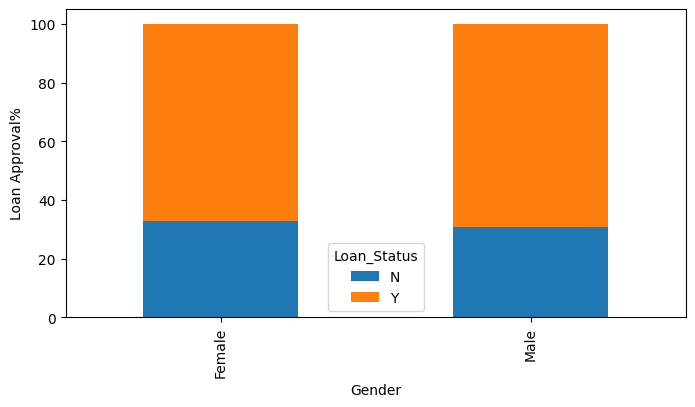

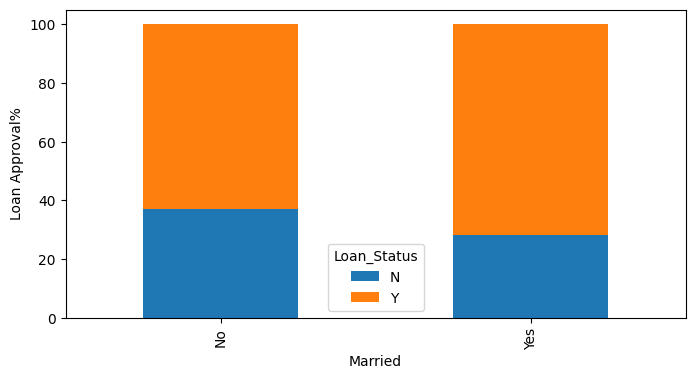

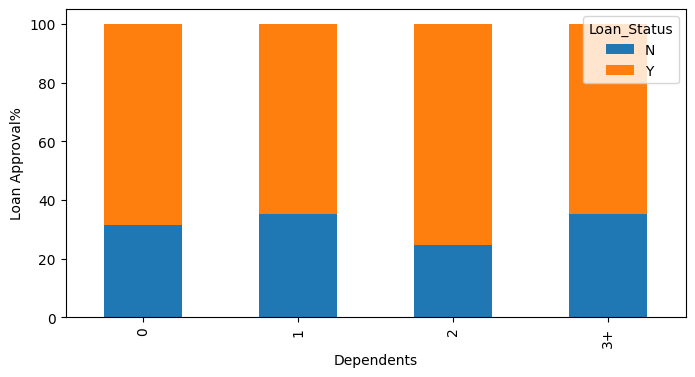

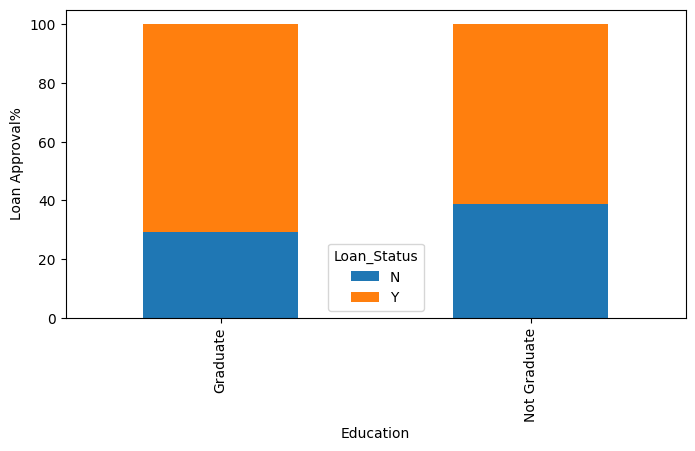

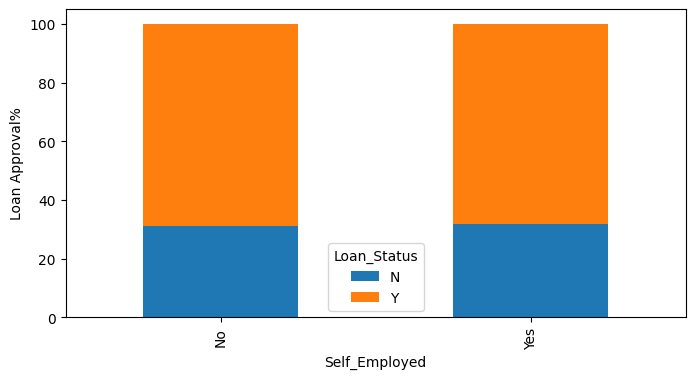

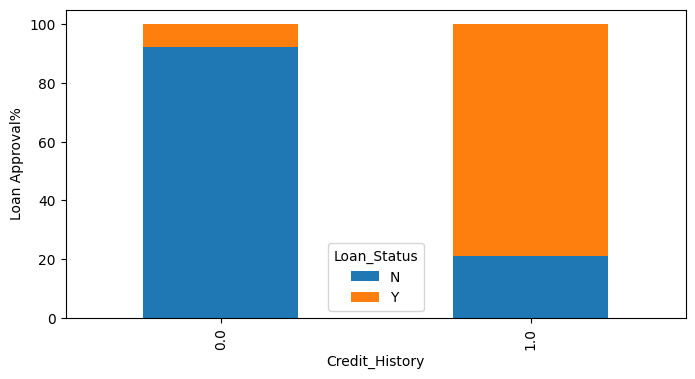

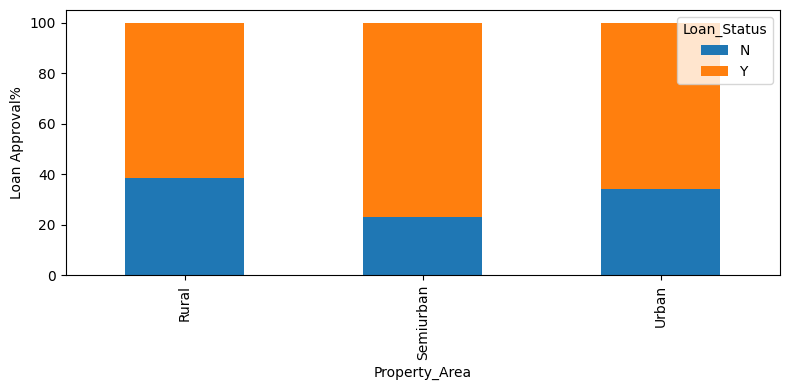

In [50]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(loan[i],loan['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Loan Approval%')

plt.tight_layout()
plt.show()

**Creating dummy variables for the categorical variables.**

In [51]:
loan['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
loan['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [54]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [55]:
loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
loan['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [57]:
loan['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

**Get dummies for categorical variables**

In [58]:
cat_cols_dummies=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

#creating dummy variables and reassigning the data frame
loan = pd.get_dummies(data = loan, columns= cat_cols_dummies, drop_first= True)

#Assigning 1 and 0 to 'Y' and 'N' for 'Loan_Status'
dict_loanstatus={'Y': 1, 'N':0}
loan['Loan_Status']=loan.Loan_Status.map(dict_loanstatus)

loan.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,True,True,True,False,False,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,1,True,True,False,False,False,False,True,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,True,True,False,False,False,True,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,False,False,True


**Separate the feature variables from the target variable**

In [59]:
y = loan['Loan_Status']
X = loan.drop(columns = ['Loan_Status', 'Loan_ID'])

**Scaling the data**

In [60]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)